# A brief tour of the IPython notebook

This document will give you a brief tour of the capabilities of the IPython notebook.  
You can view its contents by scrolling around, or execute each cell by typing `Shift-Enter`.
After you conclude this brief high-level tour, you should read the accompanying notebook 
titled `01_notebook_introduction`, which takes a more step-by-step approach to the features of the
system.  

The rest of the notebooks in this directory illustrate various other aspects and 
capabilities of the IPython notebook; some of them may require additional libraries to be executed.

**NOTE:** This notebook *must* be run from its own directory, so you must ``cd``
to this directory and then start the notebook, but do *not* use the ``--notebook-dir``
option to run it from another location.

The first thing you need to know is that you are still controlling the same old IPython you're used to,
so things like shell aliases and magic commands still work:

In [11]:
pwd

u'/home/jovyan/work'

In [9]:
ls

00_notebook_tour.ipynb  MNIST_data/      scikit-learn handwritten digits.ipynb
docker-demo-images/     python-logo.svg  tensorflow handwritten digits.ipynb


In [10]:
message = 'The IPython notebook is great!'
# note: the echo command does not run on Windows, it's a unix command.
!echo $message

The IPython notebook is great!


## Plots with matplotlib

IPython adds an 'inline' matplotlib backend,
which embeds any matplotlib figures into the notebook.

In [4]:
%pylab inline

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


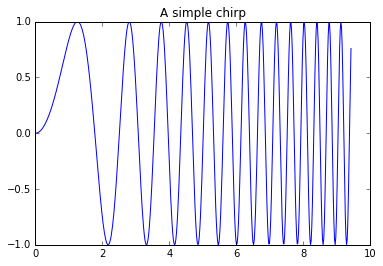

In [5]:
x = linspace(0, 3*pi, 500)
plot(x, sin(x**2))
title('A simple chirp');

You can paste blocks of input with prompt markers, such as those from
[the official Python tutorial](http://docs.python.org/tutorial/interpreter.html#interactive-mode)

In [7]:
>>> the_world_is_flat = 1
>>> if the_world_is_flat:
...     print "Be careful not to fall off!"

Be careful not to fall off!


Errors are shown in informative ways:

In [8]:
%run non_existent_file

ERROR: File `u'non_existent_file.py'` not found.


In [9]:
x = 1
y = 4
z = y/(1-x)

ZeroDivisionError: integer division or modulo by zero

When IPython needs to display additional information (such as providing details on an object via `x?`
it will automatically invoke a pager at the bottom of the screen:

In [10]:
magic

## Non-blocking output of kernel

If you execute the next cell, you will see the output arriving as it is generated, not all at the end.

In [11]:
import time, sys
for i in range(8):
    print i,
    time.sleep(0.5)

0 1 2 3 4 5 6 7


## Clean crash and restart

We call the low-level system libc.time routine with the wrong argument via
ctypes to segfault the Python interpreter:

In [12]:
import sys
from ctypes import CDLL
# This will crash a Linux or Mac system; equivalent calls can be made on Windows
dll = 'dylib' if sys.platform == 'darwin' else '.so.6'
libc = CDLL("libc.%s" % dll) 
libc.time(-1)  # BOOM!!

OSError: libc..so.6: cannot open shared object file: No such file or directory

## Markdown cells can contain formatted text and code

You can *italicize*, **boldface**

* build
* lists

and embed code meant for illustration instead of execution in Python:

    def f(x):
        """a docstring"""
        return x**2

or other languages:

    if (i=0; i<n; i++) {
      printf("hello %d\n", i);
      x += 4;
    }

Courtesy of MathJax, you can include mathematical expressions both inline: 
$e^{i\pi} + 1 = 0$  and displayed:

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

## Rich displays: include anyting a browser can show

Note that we have an actual protocol for this, see the `display_protocol` notebook for further details.

### Images

In [13]:
from IPython.display import Image
Image(filename='../../source/_static/logo.png')

IOError: [Errno 2] No such file or directory: u'../../source/_static/logo.png'

An image can also be displayed from raw data or a url

In [16]:
Image(url='http://python.org/images/python-logo.gif')

SVG images are also supported out of the box (since modern browsers do a good job of rendering them):

In [17]:
from IPython.display import SVG
SVG(filename='python-logo.svg')

Of course, if you re-run the all notebook, the two images will be the same again.

### Video

And more exotic objects can also be displayed, as long as their representation supports 
the IPython display protocol.

For example, videos hosted externally on YouTube are easy to load (and writing a similar wrapper for other
hosted content is trivial):

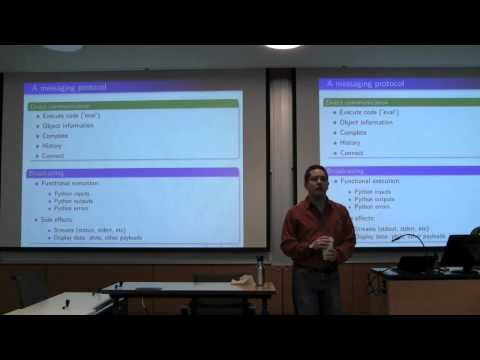

In [1]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('1j_HxD4iLn8')

Using the nascent video capabilities of modern browsers, you may also be able to display local
videos.  At the moment this doesn't work very well in all browsers, so it may or may not work for you;
we will continue testing this and looking for ways to make it more robust.  

The following cell loads a local file called  `animation.m4v`, encodes the raw video as base64 for http
transport, and uses the HTML5 video tag to load it. On Chrome 15 it works correctly, displaying a control
bar at the bottom with a play/pause button and a location slider.

In [2]:
from IPython.display import HTML
video = open("animation.m4v", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

IOError: [Errno 2] No such file or directory: 'animation.m4v'

## Local Files

The above examples embed images and video from the notebook filesystem in the output
areas of code cells.  It is also possible to request these files directly in markdown cells
if they reside in the notebook directory via relative urls prefixed with `files/`:

    files/[subdirectory/]<filename>


For example, in the example notebook folder, we have the Python logo, addressed as:

    <img src="files/python-logo.svg" />

<img src="/files/python-logo.svg" />

and a video with the HTML5 video tag:

    <video controls src="files/animation.m4v" />

<video controls src="/files/animation.m4v" />

These do not embed the data into the notebook file,
and require that the files exist when you are viewing the notebook.

### Security of local files

Note that this means that the IPython notebook server also acts as a generic file server
for files inside the same tree as your notebooks.  Access is not granted outside the
notebook folder so you have strict control over what files are visible, but for this
reason it is highly recommended that you do not run the notebook server with a notebook
directory at a high level in your filesystem (e.g. your home directory).

When you run the notebook in a password-protected manner, local file access is restricted
to authenticated users unless read-only views are active.

## Linking to files and directories for viewing in the browser

It is also possible to link directly to files or directories so they can be opened in the browser. This is especially convenient if you're interacting with a tool within IPython that generates HTML pages, and you'd like to easily be able to open those in a new browser window. Alternatively, if your IPython notebook server is on a remote system, creating links provides an easy way to download any files that get generated.

As we saw above, there are a bunch of `.ipynb` files in our current directory.

In [1]:
ls

00_notebook_tour.ipynb          formatting.ipynb
01_notebook_introduction.ipynb  octavemagic_extension.ipynb
Animations_and_Progress.ipynb   publish_data.ipynb
Capturing Output.ipynb          python-logo.svg
Script Magics.ipynb             rmagic_extension.ipynb
animation.m4v                   sympy.ipynb
cython_extension.ipynb          sympy_quantum_computing.ipynb
display_protocol.ipynb          trapezoid_rule.ipynb


If we want to create a link to one of them, we can call use the `FileLink` object.

In [2]:
from IPython.display import FileLink
FileLink('00_notebook_tour.ipynb')

Alternatively, if we want to link to all of them, we can use the `FileLinks` object, passing `'.'` to indicate that we want links generated for the current working directory. Note that if there were other directories under the current directory, `FileLinks` would work in a recursive manner creating links to files in all sub-directories as well.

In [7]:
from IPython.display import FileLinks
FileLinks('.')

### External sites

You can even embed an entire page from another site in an iframe; for example this is today's Wikipedia
page for mobile users:

In [4]:
HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')

### Mathematics

And we also support the display of mathematical expressions typeset in LaTeX, which is rendered
in the browser thanks to the [MathJax library](http://mathjax.org).  

Note that this is *different* from the above examples.  Above we were typing mathematical expressions
in Markdown cells (along with normal text) and letting the browser render them; now we are displaying
the output of a Python computation as a LaTeX expression wrapped by the `Math()` object so the browser
renders it.  The `Math` object will add the needed LaTeX delimiters (`$$`) if they are not provided:

In [10]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

With the `Latex` class, you have to include the delimiters yourself.  This allows you to use other LaTeX modes such as `eqnarray`:

In [11]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

Or you can enter latex directly with the `%%latex` cell magic:

In [12]:
%%latex
\begin{aligned}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{aligned}

There is also a `%%javascript` cell magic for running javascript directly,
and `%%svg` for manually entering SVG content.

# Loading external codes
* Drag and drop a ``.py`` in the dashboard
* Use ``%load`` with any local or remote url: [the Matplotlib Gallery!](http://matplotlib.sourceforge.net/gallery.html)

In this notebook we've kept the output saved so you can see the result, but you should run the next
cell yourself (with an active internet connection).

Let's make sure we have pylab again, in case we have restarted the kernel due to the crash demo above

In [12]:
%pylab inline


Welcome to pylab, a matplotlib-based Python environment [backend: module://IPython.zmq.pylab.backend_inline].
For more information, type 'help(pylab)'.


In [15]:
%load http://matplotlib.sourceforge.net/mpl_examples/pylab_examples/integral_demo.py

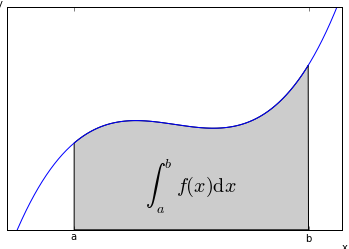

In [16]:
#!/usr/bin/env python

# implement the example graphs/integral from pyx
from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + zip(ix,iy) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()
